**Arboles de Decision**

In [ ]:
#Red Wine Quality

#1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
#2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
#3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
#4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.
#5.Entrenar el modelo configurando los diferentes hiperparámetros.
#6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
#7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
#8.Interpretar, analizar y documentar los resultados obtenidos.

In [1]:
#importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
#cargue del dataset y visualización de las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#revisamos la medida del array cargado
data.shape

(1599, 12)

In [ ]:
#1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [4]:
#observamos el detalle de las medidas estadisticas
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#revisamos si hay valores nulos en el dataset.
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario: No se presentan valores faltantes

In [ ]:
#3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

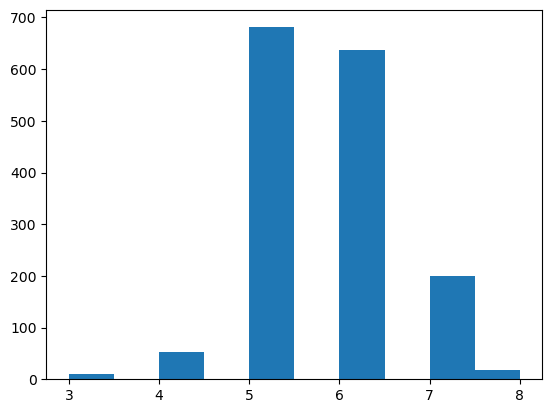

In [6]:
#creamos un histograma para conocer la cantidad de elementos por valor de calidad
plt.hist(data.quality)

<Axes: xlabel='alcohol', ylabel='total sulfur dioxide'>

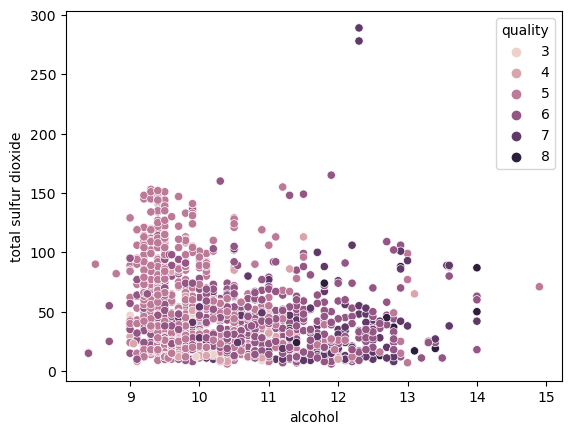

In [7]:
#generamos un diagrama de dispersion donde se observan los valores de acidez fija contra la cantidad de alcohol
sns.scatterplot(x = "alcohol", y = "total sulfur dioxide", hue = "quality", data = data)


In [ ]:
#Según el gráfico de dispersión, podemos observar que la calidad del vino aumenta mientras exista un nivel mayor de alcohol y cantidades menores de dioxido de azufre, mientras que la calidad disminuye cuando la cantidad de alcohol decrece y los niveles de dioxido de azufre se elevan.

In [8]:
#dividimos el dataset, señalando las columnas que seran las predictoras, junto con el nombre de la variable objetivo
predictors_col = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
target_col = ["quality"]

In [9]:
#guardamos los arrays cada uno en una variable
predictors = data[predictors_col]
target = data[target_col]

In [10]:
#hallamos la correlación
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [ ]:
#Según la grafica de correlación, existe una mejor correlación directa entre la acidez fija con el acido citrico y la densidad, mientras que hay una alta correlación inversa entre el pH con la acidez fija y el acido citrico.  Tambien hay una baja correlación entre el dióxido de azufre libre con la acidez volatil, el acido citrico y el alcohol.

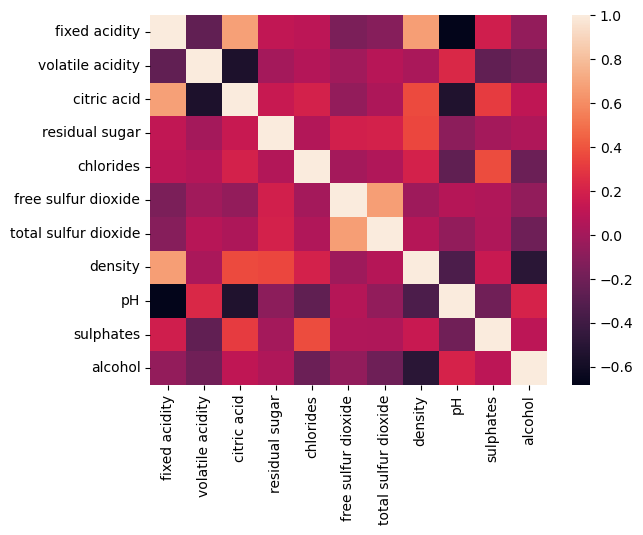

In [11]:
#revisamos los valores de correlación a través de una mapa de calor
sns.heatmap(corr)
plt.show()

In [ ]:
#4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [12]:
#dividimos el dataset en datos de train y datos de test, con un porcentaje de datos de train del 75% y datos para test del 25%
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, random_state=13)

In [13]:
#se crea el arbol de decisión
tree = DecisionTreeClassifier()

In [ ]:
#5.Entrenar el modelo configurando los diferentes hiperparámetros.

In [14]:
#se inicia con el entrenamiento del arbol de decision y se guarda en la variable arbol_wine
arbol_wine = tree.fit(x_train, y_train)

[Text(0.5111938761756425, 0.9772727272727273, 'x[10] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9, 45, 535, 514, 164, 12]'),
 Text(0.23342119451267, 0.9318181818181818, 'x[9] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.04205355538249566, 0.8863636363636364, 'x[1] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.01533576948421494, 0.8409090909090909, 'x[4] <= 0.082\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.011501827113161205, 0.7954545454545454, 'x[4] <= 0.059\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.00766788474210747, 0.75, 'x[8] <= 3.275\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.003833942371053735, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.011501827113161205, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.01533576948421494, 0.75, 'gini = 0.0\nsamples = 6\nvalu

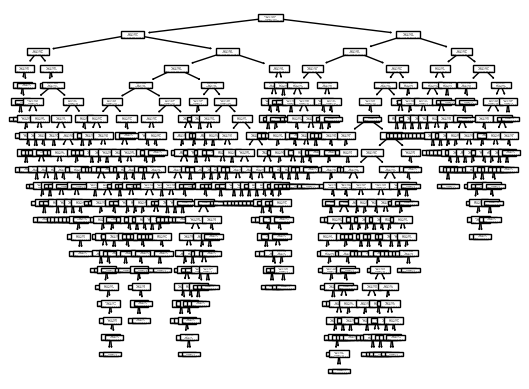

In [15]:
#visualizamos el arbol de decision resultante, donde se observa el indice de impureza de los resultados, o sea el indice Gini, el cual entre mas cercano a cero tiene menor grado de impureza
plot_tree(arbol_wine)

In [ ]:
#6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [16]:
#procedemos a realizar nuestras predicciones
predicciones = arbol_wine.predict(x_test)

In [17]:
predicciones

array([7, 5, 5, 5, 6, 5, 5, 8, 5, 7, 5, 6, 5, 6, 7, 5, 6, 5, 5, 7, 5, 6,
       7, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 5, 6, 6, 5, 6, 6, 4, 6, 5, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 7, 7,
       6, 7, 5, 3, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 8, 6, 6, 5, 5, 5, 7, 5,
       7, 5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 7, 6, 5, 6, 6, 3, 6, 5, 7,
       7, 7, 6, 6, 5, 5, 6, 7, 5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 5, 5, 7, 5, 6, 7, 6, 5, 3, 6, 7, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 4, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 7,
       5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 7, 5, 5, 5, 6, 7,
       5, 5, 6, 5, 6, 6, 5, 6, 4, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6,
       6, 6, 5, 6, 8, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 6, 7, 5,
       6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 4, 4, 6, 5, 7, 5,
       6, 7, 5, 5, 5, 6, 5, 7, 5, 6, 7, 5, 5, 5, 5,

In [ ]:
#7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

In [18]:
#revisamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=["Actual"], colnames=["Predicciones"])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,1,0,0,0,0,0
4,0,3,4,0,1,0
5,2,1,106,32,5,0
6,0,2,32,75,13,2
7,0,0,5,13,17,0
8,0,0,2,1,2,1


In [19]:
#usamos accuracy para comparar los valores reales con las predicciones, teniendo como resultado la exactitud del modelo
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.634375

In [ ]:
#8.Interpretar, analizar y documentar los resultados obtenidos.

In [ ]:
#Conclusiones:
#- Al utilizar un 75% de la data como train, se obtiene un 0,595 de accuracy
#- Se obtiene un valor de accuracy de 0,6218 si se usa un 80% de la data para train.
#- El modelo presenta diferencia importante con los valores 5 y 6 de la variable Quality  